# Some simple computations

The main purpose of this notebook is to illustrate a bit of relatively simple Python code - the kind of code that I expect folks in my numerical analysis classes to be able to read, understand, and emulate. There is some mathematics behind the code that we'll deal with later.

## The very basics

I suppose we outta be able to add two and two!

In [1]:
2+2

4

We could define and evaluate a function.

In [2]:
def f(x): return x**2
[f(x) for x in range(5)]

[0, 1, 4, 9, 16]

Many functions must be loaded from a package.

In [3]:
from numpy import sin,pi,arange
[sin(x) for x in arange(-5*pi/2,5*pi/2,pi/2)]

[-1.0,
 2.4492935982947064e-16,
 1.0,
 -1.2246467991473532e-16,
 -1.0,
 0.0,
 1.0,
 1.2246467991473532e-16,
 -1.0,
 -2.4492935982947064e-16]

Often, we'll just import the whole package into a namespace and then prepend the namespace. Thus, the previous input could be typed as follows:

In [4]:
import numpy as np
[np.sin(x) for x in np.arange(-5*np.pi/2,5*np.pi/2,np.pi/2)]

[-1.0,
 2.4492935982947064e-16,
 1.0,
 -1.2246467991473532e-16,
 -1.0,
 0.0,
 1.0,
 1.2246467991473532e-16,
 -1.0,
 -2.4492935982947064e-16]

While this might seem like a bit of a pain, it's a nice way to avoid name clashes when working with multiple packages. We'll need to do that when we graphing functions, for example.

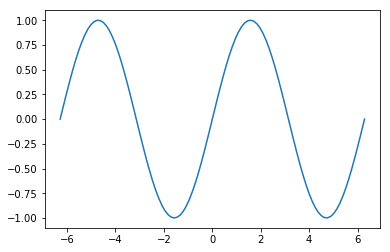

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-2*np.pi,2*np.pi,100)
y = np.sin(x)
plt.plot(x,y)

## A bit more

Here's the basic problem: Solve the equation $\cos(x)=x$. Like a lot of interesting problems, this is very easy to state and understand, but quite hard to solve. It's *impossible* to solve symbolically, in fact! As we'll learn in a few weeks, though, there are fabulous algorithms to find *numerical approximations* to solutions. One of these, called Newton's method, searches for a single *root* of a function close to an initial guess. This is an absolutely fundamental technique in numerical analysis and is implemented in Scipy's `optimize` module as `newton`. Here's how to invoke it to find a solution to our equation near the initial guess $x_0=1$.

In [6]:
# import the Numpy library, where the cosine is defined.
import numpy as np

# import newton
from scipy.optimize import newton

# define the function whose root is the solution we seek
def f(x): return np.cos(x)-x

# invoke newton
newton(f,1)

0.73908513321516067

The comments and spaces are not necessary, so that's really just four lines of code.

Like many algorithms, Newton's algorithm is iterative. As it turns out in fact, we can solve the equation by simply iterating the cosine function! We'll learn a bit later why this works but here's how to implement the idea in Python.

In [7]:
x1 = 1
x2 = np.cos(1)
cnt = 0
while np.abs(x1-x2) > 10**(-8) and cnt < 100:
    x1 = x2
    x2 = np.cos(x2)
    cnt = cnt + 1
(x2,cnt)

(0.73908513664657183, 45)

I guess this says that, after 45 iterates, the difference between $x$ and $\cos(x)$ is less than $1/10^8$. So, we're pretty close.

The code so far illustrates that there's a couple of libraries that we'll use a lot - NumPy (which implements a lot of relatively low level functionality) and SciPy (which implements higher level functionality built on top of NumPy).

Very often, it's nice to visualize your results. There are a number of very nice Python libraries for visualization but one of the most popular and widely used is called Matplotlib. In addition, Matplotlib is included in Anaconda, so that's what we'll use for the most part.

My expectation is that you can at least do a little basic plotting with Matplotlib. Here's how to $f(x)=\cos(x)$ together with the line $y=x$, as well as the point where they are equal.

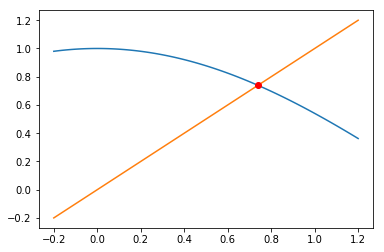

In [8]:
# A cell magic to run Matplotlib inside the notebook.
# Not totally necessary, but sometimes nice.
%matplotlib inline

# Import the plotting module
import matplotlib.pyplot as plt

# Set up the x-values we wish to plot.
# 100 of them evenly distributed over [-0.2,1.2]
xs = np.linspace(-0.2,1.2,100)

# Plot the cosine function over those x-values
plt.plot(xs,np.cos(xs))

# Plot the line y=x
plt.plot(xs,xs)

# Plot the soution as a red dot.
plt.plot(x2,x2,'ro')

If we keep track of our orbit as we progress, we can go a bit farther and illustrate the convergence of the orbit with a [cobweb plot](https://en.wikipedia.org/wiki/Cobweb_plot).

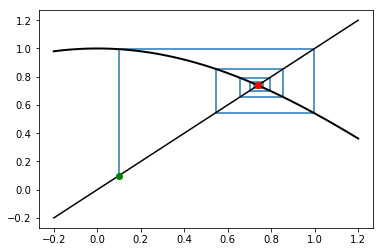

In [9]:
x0 = .1
x1 = x0
orbitx = [x1]
orbity = [x1]

x2 = np.cos(x1)
cnt = 0
while np.abs(x1-x2) > 10**(-8) and cnt < 100:
    orbitx.extend([x1,x2])
    orbity.extend([x2,x2])
    x1 = x2
    x2 = np.cos(x2)
    cnt = cnt + 1
xs = np.linspace(-0.2,1.2,100)
plt.plot(orbitx,orbity)
plt.plot(xs,np.cos(xs), 'k', linewidth=2)
plt.plot(xs,xs, 'k')
plt.plot(x0,x0,'go')
plt.plot(x2,x2,'ro')

In my own images, I will often go a bit overboard with options to specify things exactly the way I want. I emphasize, this level of graphic detail is not your responsibility!

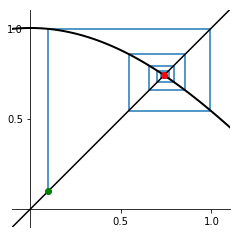

In [10]:
import matplotlib as mpl
plt.plot(orbitx,orbity)
plt.plot(xs,np.cos(xs), 'k', linewidth=2)
plt.plot(xs,xs, 'k')
plt.plot(x0,x0,'go')
plt.plot(x2,x2,'ro')

ax = plt.gca()
ax.set_aspect(1)
ax.set_ylim(-0.1,1.1)
ax.set_xlim(-0.1,1.1)
ax.set_xticks([1/2,1])
ax.set_yticks([1/2,1])

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

xaxis,yaxis = ax.findobj(mpl.axis.Axis)
xticks = xaxis.get_major_ticks()
for tick in xticks:
    tick.get_children()[1].set_color('w')
yticks = yaxis.get_major_ticks()
for tick in yticks:
    tick.get_children()[1].set_color('w')

## A disturbing computation

Is addition commutative?

In [11]:
0.1 + (0.2 + -0.3)

2.7755575615628914e-17

In [12]:
(0.1+0.2) + -0.3

5.551115123125783e-17

I guess that addition is *not* commutative.